## Importing Basic Packages

In [104]:
import pandas as pd
import random
import numpy as np
import pickle
import matplotlib.pyplot as plt


## Importing Data

In [105]:
data=pd.read_csv('main_dataset.csv')

In [106]:
with open('jobrole_mapper.txt', 'rb') as handle:
    dat = handle.read()
o = pickle.loads(dat)

In [107]:
with open('location_mapper.txt', 'rb') as handle:
    dat = handle.read()
m = pickle.loads(dat)

In [108]:
with open('state_mapper.txt', 'rb') as handle:
    dat = handle.read()
n = pickle.loads(dat)

## Feature Extraction

### Determination of Branches 

In [109]:
branch=[]
for c in data['JOB_TITLE']:
    if c in o['cse']:
        branch.append('CSE/IT')
    elif c in o['ece']:
        branch.append('ECE')
    elif c in o['eee']:
        branch.append('EEE')
    elif c in o['mec']:
        branch.append('MEC')
    elif c in o['civ']:
        branch.append('CIV')
    else:
        branch.append('CHEM')

In [110]:
data['BRANCH']=branch

### Determination of States

In [111]:
stater=[]
for v in data['JOB_LOCATION']:
    for w in m:
        if v in m[w]:
            stater.append(w)
            break

In [112]:
data['LOC_STATE']=stater

### Determination of Regions

In [113]:
regionr=[]
for v in data['LOC_STATE']:
    for w in n:
        if v in n[w]:
            regionr.append(w)
            break

In [114]:
data['LOC_REGION']=regionr

In [115]:
data=data[['YEAR','JOB_TITLE','BRANCH','JOB_LOCATION','LOC_STATE','LOC_REGION']]

In [116]:
data

,YEAR,JOB_TITLE,BRANCH,JOB_LOCATION,LOC_STATE,LOC_REGION
0,2015,Field test engineer,ECE,Gaya,Bihar,Central
1,2018,Electrical project manager,EEE,Jamshedpur,Jharkhnad,Central
2,2020,Management consultant,MEC,Surat,Gujarat,West
3,2013,Database administrator,CSE/IT,Thiruvananthapuram,Kerala,South
4,2016,Controls engineer,EEE,Allahabad,Uttar Pradesh,North
...,...,...,...,...,...,...
9433,2019,Telecommunication engineer,EEE,Surat,Gujarat,West
9434,2020,Production engineer,MEC,Rourkela,Orissa,Central
9435,2017,Product engineer,CHEM,Udaipur,Rajasthan,West
9436,2014,UX designer,CSE/IT,Durgapur,West Bengal,East


## Considering past 11 years

In [117]:
years=[2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

## Considering next 5 years for prediction

In [118]:
x_pred=[2022,2023,2024,2025,2026]

## Importing queries

In [119]:
query=pd.read_csv('queries.csv')

In [120]:
query.drop(['Unnamed: 0'],axis=1,inplace=True)

In [121]:
query

,BRANCH,LOC_STATE,LOC_REGION
0,CIV,Bihar,Central
1,CSE/IT,Uttarakhand,North
2,MEC,Telangana,South
3,MEC,Uttar Pradesh,North
4,CHEM,Goa,South
5,CHEM,Kerala,South
6,MEC,Jammu and Kashmir,North
7,CHEM,Andhra Pradesh,South
8,CIV,Gujarat,West
9,MEC,Bihar,Central


## Feature scaling

In [122]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))

## Generation of training dataset 

In [123]:
train_x=[]
train_y=[]

In [124]:
for index,row in query.iterrows():
    y1=[]
    x_train=[]
    p=data.loc[(data['BRANCH']==row['BRANCH']) & (data['LOC_STATE']==row['LOC_STATE']) & (data['LOC_REGION']==row['LOC_REGION'])]
    for i in years:
        y=p.loc[p['YEAR']==i].shape[0]
        y*=98
        y1.append(y)
    y1=np.array(y1[:8])
    y1=y1.reshape(-1,1)
    scaled = sc.fit_transform(y1)
    for j in range(scaled.shape[0]-3):
        x_train.append(scaled[j:j+3,])
        train_y.append(scaled[j+3][0])
    train_x.append(np.array(x_train))
train_x=np.array(train_x)
train_y=np.array(train_y)

In [125]:
train_x=train_x.reshape(250,3,1)

## Generation of test dataset

In [126]:
test_x=[]
test_y=[]
for index,row in query.iterrows():
    y2=[]
    x_test=[]
    p=data.loc[(data['BRANCH']==row['BRANCH']) & (data['LOC_STATE']==row['LOC_STATE']) & (data['LOC_REGION']==row['LOC_REGION'])]
    for i in years:
        y=p.loc[p['YEAR']==i].shape[0]
        y*=98
        y2.append(y)
    y2=np.array(y2[7:])
    y2=y2.reshape(-1,1)
    scaled2= sc.fit_transform(y2)
    for j in range(scaled2.shape[0]-3):
        x_test.append(scaled2[j:j+3,])
        test_y.append(scaled2[j+3][0])
    test_x.append(np.array(x_test))
test_x=np.array(test_x)
test_y=np.array(test_y)

In [127]:
test_x=test_x.reshape(test_x.shape[0],3,1)

## Model Building

In [128]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [129]:
regressor = Sequential()

In [130]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (train_x.shape[1], 1)))

In [131]:
regressor.add(Dropout(rate = 0.2))

In [132]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

In [133]:
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

In [134]:
regressor.add(Dense(units = 1))

## Model Compilation

In [135]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

## Model Training

In [136]:
regressor.fit(x = train_x, y = train_y, batch_size = 15, epochs = 50)

Epoch 1/50
17/17 [==============================] - 25s 29ms/step - loss: 0.2736
Epoch 2/50
17/17 [==============================] - 0s 27ms/step - loss: 0.1404
Epoch 3/50
17/17 [==============================] - 0s 27ms/step - loss: 0.1371
Epoch 4/50
17/17 [==============================] - 0s 27ms/step - loss: 0.1323
Epoch 5/50
17/17 [==============================] - 0s 27ms/step - loss: 0.1343
Epoch 6/50
17/17 [==============================] - 0s 25ms/step - loss: 0.1346
Epoch 7/50
17/17 [==============================] - 0s 24ms/step - loss: 0.1341
Epoch 8/50
17/17 [==============================] - 0s 24ms/step - loss: 0.1307
Epoch 9/50
17/17 [==============================] - 0s 24ms/step - loss: 0.1334
Epoch 10/50
17/17 [==============================] - 0s 23ms/step - loss: 0.1321
Epoch 11/50
17/17 [==============================] - 0s 23ms/step - loss: 0.1305
Epoch 12/50
17/17 [==============================] - 0s 22ms/step - loss: 0.1359
Epoch 13/50
17/17 [=================

## Model Prediction

In [137]:
predicted_y = regressor.predict(test_x)

2/2 [==============================] - 4s 15ms/step


## Model Evaluation

In [138]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [139]:
print('mae=',mean_absolute_error(test_y,predicted_y))
print('mse=',mean_squared_error(test_y,predicted_y))
print('r2_score=',r2_score(test_y,predicted_y))

mae= 0.3718202179594645
mse= 0.1717399762458659
r2_score= 0.017955136722942355


## Inverse Scaling to get actual values

In [140]:
trans_y = sc.inverse_transform(predicted_y)

In [141]:
trans_y.dtype=int

## Function to produce output based on user's queries

In [142]:
def final(region,state,course):
    u=data.loc[(data['BRANCH']==course) & (data['LOC_STATE']==state) & (data['LOC_REGION']==region)]
    o=[]
    for i in years:
        y=u.loc[u['YEAR']==i].shape[0]
        o.append(y*98) 
    h=[]
    for i in range(5):
        f=np.array(o[-3:],dtype='object')
        f=f.reshape(-1,1)
        scaled_f= sc.fit_transform(f)
        scaled_f=scaled_f.reshape(1,3,1)
        predicted_f= regressor.predict(scaled_f)
        bhu=sc.inverse_transform(predicted_f)
        h.append(int(bhu))
        o.append(int(bhu))
        h=list(h)
    fig= plt.figure()
    fig.set_figwidth(10)
    fig.set_figheight(5)
    plt.plot(years,o[:-5])
    plt.plot(x_pred,h)
    plt.xticks(years+x_pred,years+x_pred)
    plt.show()

1/1 [==============================] - 0s 85ms/step


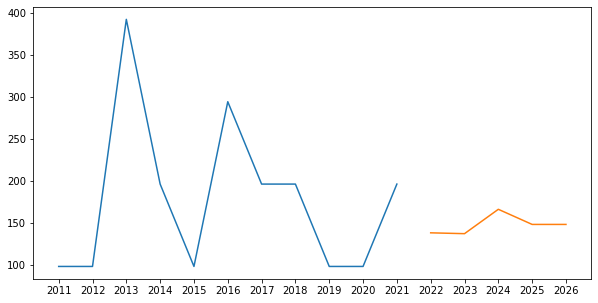

In [145]:
final('South','Goa','MEC')